In [9]:
import pandas as pd
import ast
from datasets import load_dataset
import matplotlib.pyplot as plt

#Loading Data
dataset = load_dataset("lukebarousse/data_jobs")
df = dataset['train'].to_pandas()

#Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [15]:
df_DA_US = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'] == 'United States')].copy()
df_DA_US = df_DA_US.dropna(subset = ['salary_year_avg'])

In [17]:
df_DA_US['salary_year_avg'].sample

231122     75000.0
142450     84000.0
751453     58800.0
86060      60000.0
575275    117000.0
411044    111500.0
614864    115000.0
27518     103000.0
449174     79415.5
286562    100000.0
Name: salary_year_avg, dtype: float64

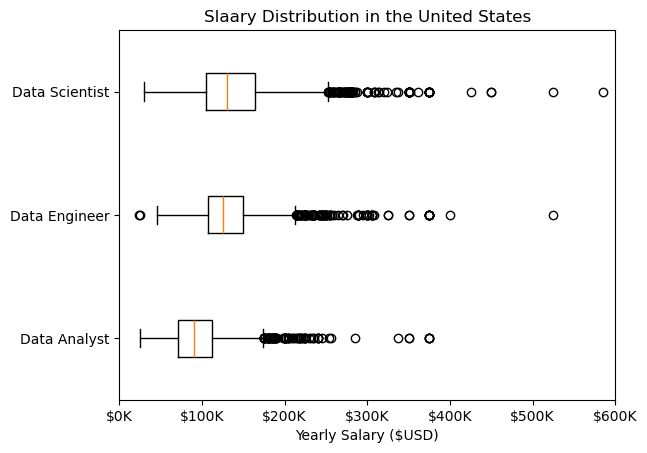

In [34]:
job_titles = ['Data Analyst', 'Data Engineer', 'Data Scientist']
df_US = df[(df['job_title_short'].isin(job_titles)) & (df['job_country'] == 'United States')].copy()
df_US = df_US.dropna(subset = ['salary_year_avg'])

job_list = [df_US[df_US['job_title_short'] == job_title]['salary_year_avg'] for job_title in job_titles]

plt.boxplot(job_list, labels = job_titles, vert = False)
plt.title('Salary Distribution in the United States')
plt.xlabel('Yearly Salary ($USD)')
ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}K'))
plt.xlim(0,600000)

plt.show()

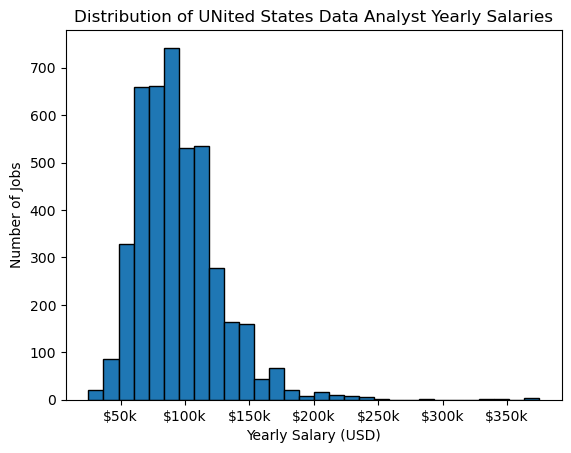

In [38]:
df_DA_US['salary_year_avg'].plot(kind = 'hist', bins = 30, edgecolor = 'black')

plt.title('Distribution of UNited States Data Analyst Yearly Salaries')
plt.xlabel('Yearly Salary (USD)')
plt.ylabel('Number of Jobs')
ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos:f'${int(y/1000)}k'))
plt.show()

In [39]:
import seaborn as sns

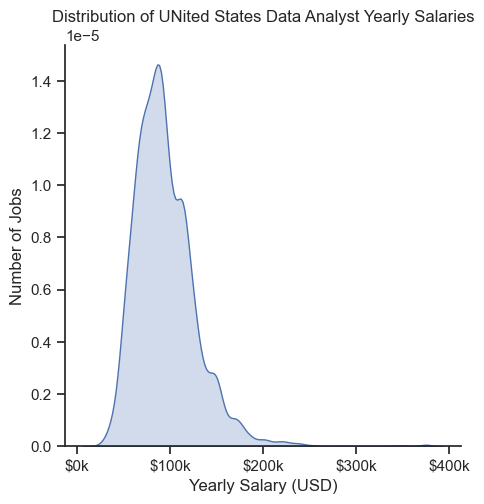

In [45]:
#df_DA_US['salary_year_avg'].plot(kind = 'hist', bins = 30, edgecolor = 'black')
sns.set_theme(style = 'ticks')
sns.displot(df_DA_US['salary_year_avg'], kind = 'kde', fill = True)

plt.title('Distribution of UNited States Data Analyst Yearly Salaries')
plt.xlabel('Yearly Salary (USD)')
plt.ylabel('Number of Jobs')
ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos:f'${int(y/1000)}k'))
plt.show()